# Pima Indians Diabetes - EDA & Prediction 

## Bước 1. Chuẩn bị dữ liệu 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
diabetes = pd.read_csv("diabetes.csv")

In [11]:
# Kiểm tra số lượng giá trị bằng 0 ở mỗi cột
(diabetes == 0).sum()



Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
# Thay thế các giá trị 0 không hợp lý (vì nhiều cột không thể bằng 0)
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    diabetes[col] = diabetes[col].replace(0, diabetes[col].mean())

# Xem 5 dòng đầu
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


##### Một số cột (như Glucose, BloodPressure, BMI) có thể có giá trị 0, điều này không hợp lý trong y học.  
#####  
##### Ta thay thế 0 bằng giá trị trung bình của cột để dữ liệu hợp lý hơn.  
#####  
##### Đây là bước làm sạch dữ liệu trước khi trực quan hóa.  


## Bước 2. Trực quan hóa bằng Matplotlib

### Case 1: Basic

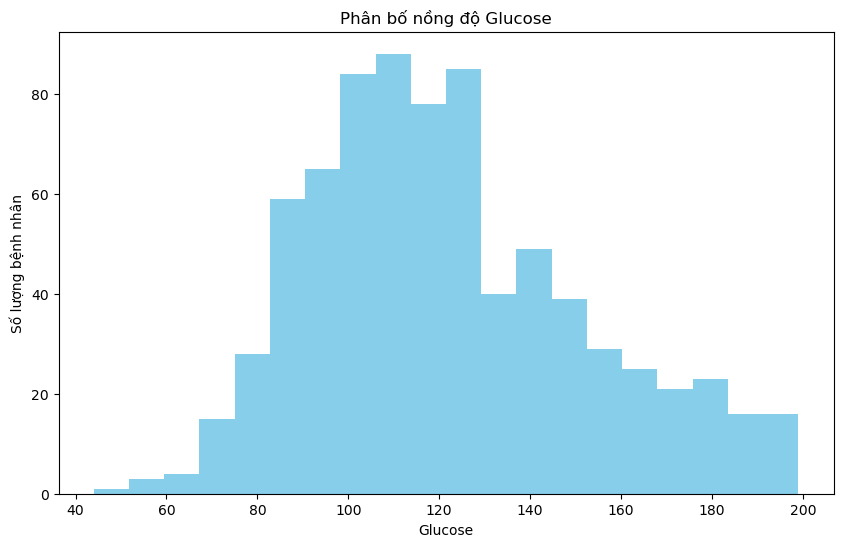

In [10]:
plt.figure(figsize=(10,6))
plt.hist(diabetes['Glucose'], bins=20, color='skyblue')
plt.title('Phân bố nồng độ Glucose')
plt.xlabel('Glucose')
plt.ylabel('Số lượng bệnh nhân')
plt.show()


### Case 2: Advanced 1

C:\Users\HP\AppData\Local\Temp\ipykernel_14008\3789827536.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([diabetes['Glucose'], diabetes['BMI'], diabetes['BloodPressure']], labels=['Glucose', 'BMI', 'BloodPressure'])


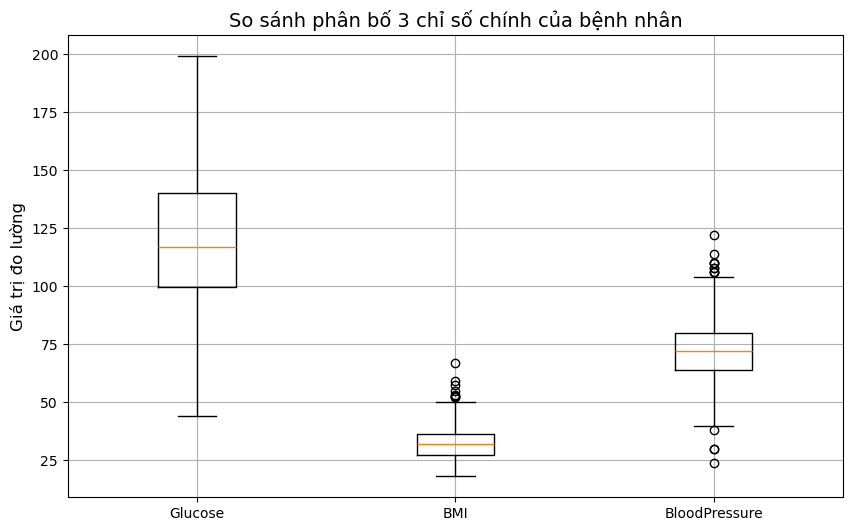

In [11]:
plt.figure(figsize=(10,6))
plt.boxplot([diabetes['Glucose'], diabetes['BMI'], diabetes['BloodPressure']], labels=['Glucose', 'BMI', 'BloodPressure'])
plt.title('So sánh phân bố 3 chỉ số chính của bệnh nhân', fontsize=14)
plt.ylabel('Giá trị đo lường', fontsize=12)
plt.grid(True)
plt.show()


##### Biểu đồ boxplot cho thấy:
##### Trung vị, vùng phân bố chính (IQR)
##### Các điểm ngoại lệ (outliers) của từng chỉ số sức khỏe.
##### → Giúp nhận biết chỉ số nào biến động mạnh nhất.

### Case 3: Advanced 2

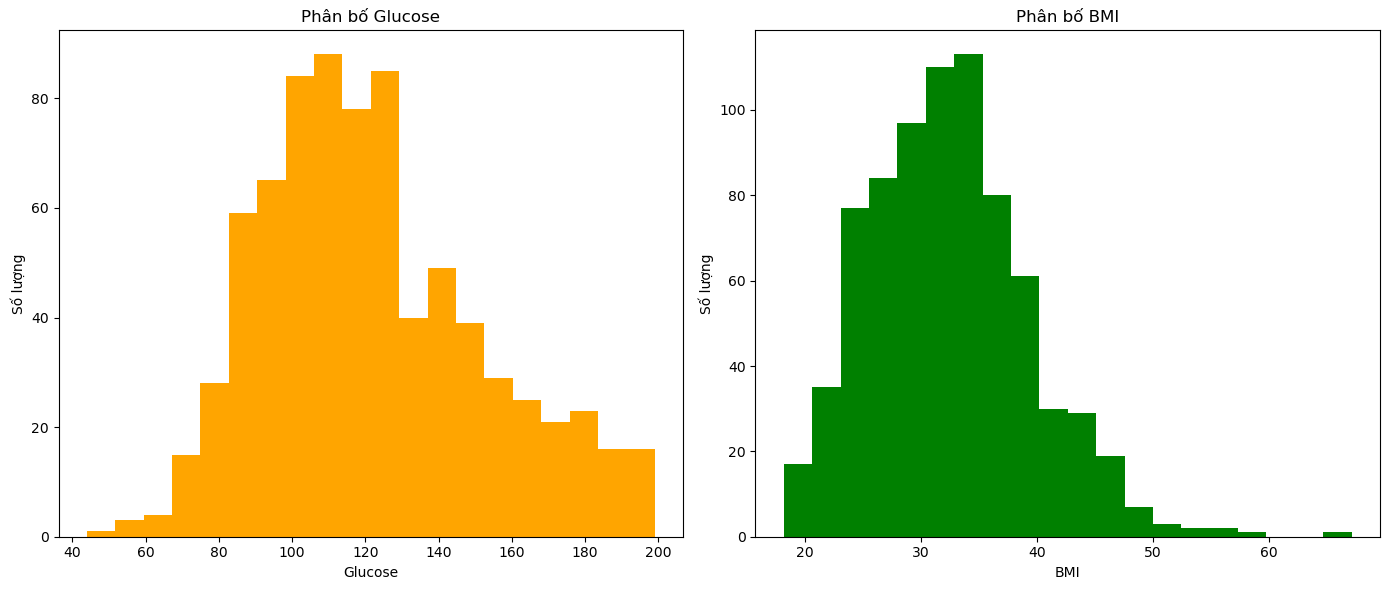

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Biểu đồ 1: Glucose
ax[0].hist(diabetes['Glucose'], bins=20, color='orange')
ax[0].set_title('Phân bố Glucose')
ax[0].set_xlabel('Glucose')
ax[0].set_ylabel('Số lượng')

# Biểu đồ 2: BMI
ax[1].hist(diabetes['BMI'], bins=20, color='green')
ax[1].set_title('Phân bố BMI')
ax[1].set_xlabel('BMI')
ax[1].set_ylabel('Số lượng')

plt.tight_layout()
plt.show()


##### Glucose (đường huyết)

##### BMI (chỉ số khối cơ thể)
##### → Dễ thấy nhóm bệnh nhân có BMI và Glucose cao có khả năng mắc tiểu đường

## Bước 3 Trực quan hóa dữ liệu với thư viện Seaborn

### Case 1: Basic

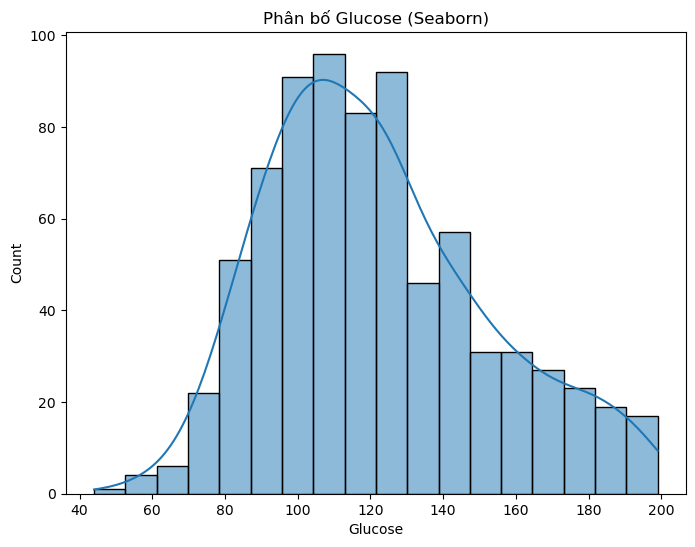

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(data=diabetes, x='Glucose', kde=True)
plt.title('Phân bố Glucose (Seaborn)')
plt.show()


##### Phân bố Glucose (biểu đồ histplot)  
#####  
##### Đường cong phân bố cho thấy đa số bệnh nhân có nồng độ Glucose tập trung quanh mức 100–130.  
#####  
##### Tuy nhiên, có một nhóm nhỏ có Glucose rất cao (trên 150), và đây là nhóm có nguy cơ mắc tiểu đường cao.  
#####  
##### Đường kde (mật độ xác suất) cho thấy dữ liệu hơi lệch phải → có nhiều bệnh nhân có mức đường huyết cao bất thường.  
#####  
##### Kết luận nhỏ: Glucose là chỉ số có ảnh hưởng mạnh nhất đến khả năng mắc bệnh tiểu đường.


### Case 2: Advanced 1

C:\Users\HP\AppData\Local\Temp\ipykernel_14008\2851261835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetes, x='Outcome', y='Glucose', palette='coolwarm')


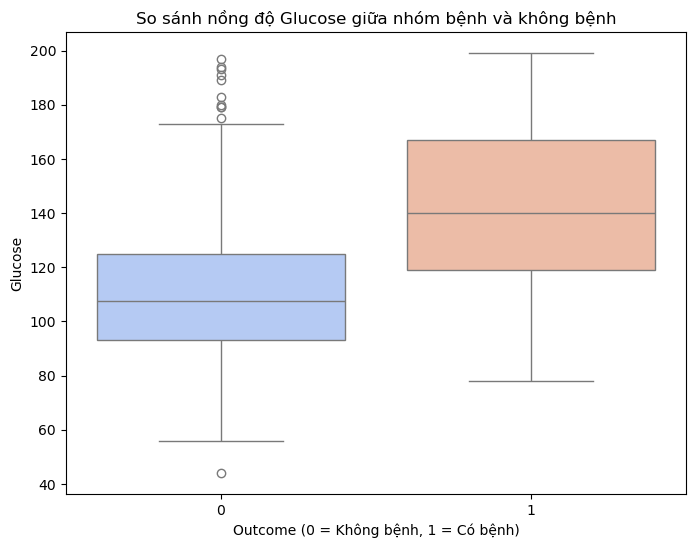

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(data=diabetes, x='Outcome', y='Glucose', palette='coolwarm')
plt.title('So sánh nồng độ Glucose giữa nhóm bệnh và không bệnh')
plt.xlabel('Outcome (0 = Không bệnh, 1 = Có bệnh)')
plt.ylabel('Glucose')
plt.show()


##### So sánh Glucose giữa nhóm bệnh và không bệnh (boxplot)  
#####  
##### Nhóm Outcome = 1 (bị tiểu đường) có median (trung vị) Glucose cao hơn hẳn nhóm Outcome = 0.  
#####  
##### Dải giá trị (IQR) của nhóm bệnh cũng cao và rộng hơn, nghĩa là mức Glucose của nhóm này không chỉ cao hơn mà còn dao động nhiều hơn.  
#####  
##### Kết luận nhỏ: Glucose là chỉ số phân tách rõ ràng nhất giữa người mắc và không mắc tiểu đường.  


### Case 3: Multi-perspective

C:\Users\HP\AppData\Local\Temp\ipykernel_14008\3004412951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetes, x='Outcome', y='BMI', palette='Blues', ax=ax[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\3004412951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetes, x='Outcome', y='Age', palette='Greens', ax=ax[1])


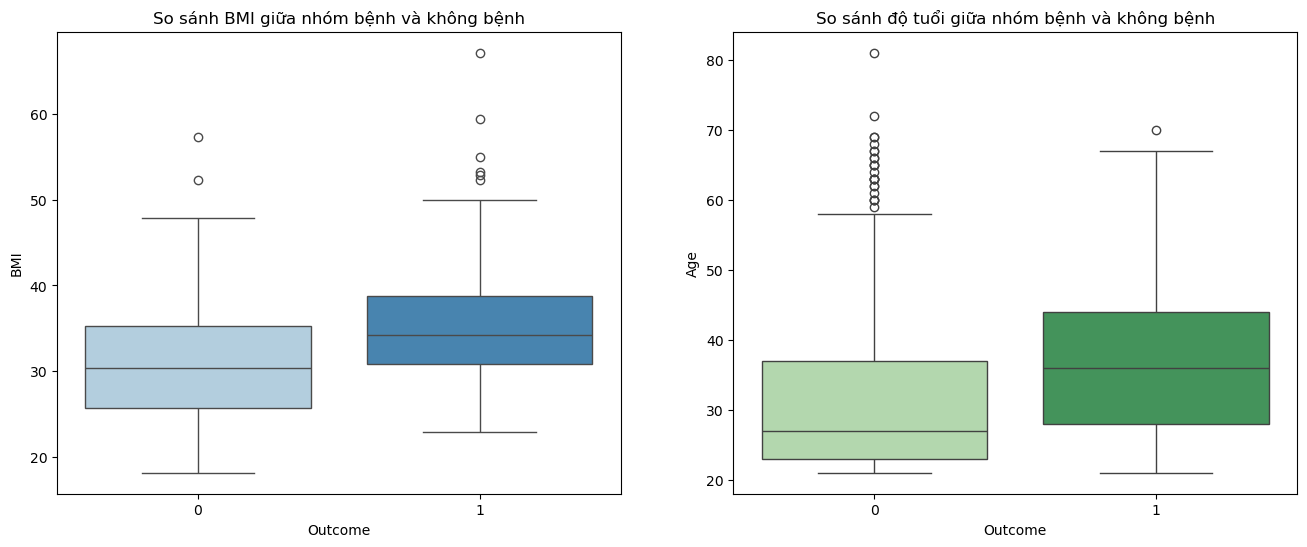

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.boxplot(data=diabetes, x='Outcome', y='BMI', palette='Blues', ax=ax[0])
ax[0].set_title('So sánh BMI giữa nhóm bệnh và không bệnh')

sns.boxplot(data=diabetes, x='Outcome', y='Age', palette='Greens', ax=ax[1])
ax[1].set_title('So sánh độ tuổi giữa nhóm bệnh và không bệnh')

plt.show()


##### 3. So sánh BMI và Age giữa hai nhóm (biểu đồ song song)  
#####  
##### BMI: Nhóm bệnh (Outcome = 1) có BMI trung bình cao hơn → thể hiện xu hướng thừa cân hoặc béo phì là yếu tố nguy cơ lớn.  
#####  
##### Age: Nhóm bệnh thường ở độ tuổi cao hơn rõ rệt, cho thấy nguy cơ mắc bệnh tăng theo tuổi.  
#####  
##### Kết luận nhỏ: Cả BMI và Age đều là yếu tố quan trọng ảnh hưởng đến khả năng mắc tiểu đường, trong đó BMI thể hiện ảnh hưởng rõ rệt hơn.  


## Kết luận 
##### Người mắc tiểu đường thường có nồng độ Glucose cao hơn rõ rệt, chỉ số BMI và Insulin cũng cao hơn trung bình.  
#####  
##### Tuổi và số lần mang thai (Pregnancies) cũng góp phần làm tăng nguy cơ mắc bệnh.  
#####  
##### Trong đó, Glucose là yếu tố quan trọng nhất giúp phân biệt nhóm có và không có tiểu đường.  
